In [1]:
from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as tr
import torchvision
import torch

import matplotlib.pyplot as plt
import numpy as np

/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_images = np.random.randint(256, size = (100, 32, 32, 3)) / 255
train_labels = np.random.randint(2,   size = (100, 1))

In [3]:
class TensorData(Dataset):
    def __init__(self, x, y):
        self.x = torch.FloatTensor(x)
        self.x = self.x.permute(0, 3, 1, 2)
        self.y = torch.LongTensor(y)
        self.len = self.y.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [4]:
train_data = TensorData(train_images, train_labels)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

# Custom data & Pre-processing

In [5]:
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2, 0, 1)
        return inputs, torch.LongTensor(labels)

In [6]:
class CutOut:
    def __init__(self, ratio = 0.5):
        self.ratio = int(1 / ratio)

    def __call__(self, sample):
        inputs, labels = sample
        active = int(np.random.randint(0, self.ratio, 1))

        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len / 4)

            idx = int(np.random.randint(0, min_len - box_size, 1))
            inputs[:, idx:idx + box_size, idx:idx + box_size] = 0

        return inputs, labels

In [7]:
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = y
        self.tranform = transform
        self.len = len(y)
        self.tensor = ToTensor()

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]

        if self.tranform:   sample = self.tranform(sample)
        else:               sample = self.tensor(sample)
        
        return sample

    def __len__(self):
        return self.len

In [8]:
trans = tr.Compose([ToTensor(), CutOut()])
dataset1 = MyDataset(train_images, train_labels, transform=trans)
train_dataloader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

In [9]:
images1, labels1 = iter(train_loader)._next_data()

def imshow(img):
    plt.figure(figsize=(10, 100))
    plt.imshow(img.permute(1, 2, 0).numpy())
    plt.show()

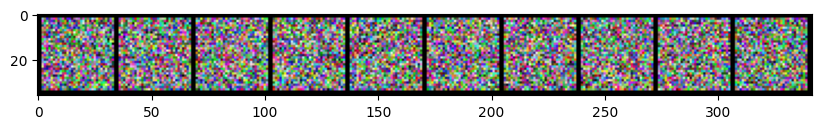

In [10]:
imshow(torchvision.utils.make_grid(images1, nrow=10))

In [17]:
class MyTransform:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2, 0, 1)

        labels = torch.FloatTensor(labels)

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()])
        final_output = transf(inputs)

        return final_output, labels

In [18]:
dataset2 = MyDataset(train_images, train_labels, transform=MyTransform())
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

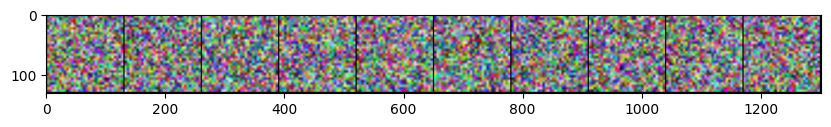

torch.Size([10, 3, 128, 128])


In [19]:
images, labels = iter(train_loader2)._next_data()
imshow(torchvision.utils.make_grid(images, nrow=10))
print(images.size())